# Multi Layer Perceptron

A single-layer perceptron cannot solve the XOR problem because XOR is not linearly separable. In other words, no single linear decision boundary can separate the 1s and 0s in XOR. To solve XOR, you would need a multi-layer perceptron (MLP) with at least one hidden layer, allowing the model to learn a non-linear decision boundary.

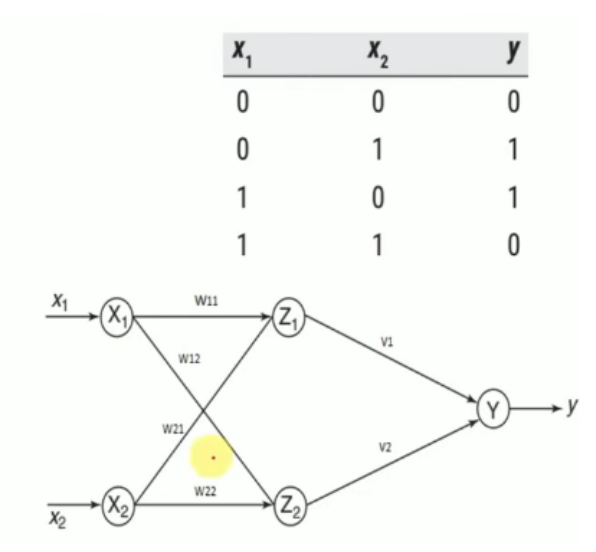

### Hardcoding neurons

In [1]:
import numpy as np

# Activation function (step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Define the weights for the XOR gate
# Weights for hidden layer neurons Z1 and Z2
W11, W12 = 1, 1   # weights from inputs X1 and X2 to Z1
W21, W22 = 1, 1   # weights from inputs X1 and X2 to Z2
B1, B2 = -0.5, -1.5  # biases for Z1 and Z2

# Weights from hidden layer to output neuron Y
V1, V2 = 1, -1    # weights from Z1 and Z2 to output Y
B3 = -0.5         # bias for Y

# XOR input and expected output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_expected = np.array([0, 1, 1, 0])

# Feed-forward function to compute XOR output
def xor_network(x1, x2):
    # Compute hidden layer outputs
    Z1 = step_function(x1 * W11 + x2 * W12 + B1)
    Z2 = step_function(x1 * W21 + x2 * W22 + B2)

    # Compute output layer
    Y = step_function(Z1 * V1 + Z2 * V2 + B3)
    return Y

# Testing the network with all XOR inputs
for inputs, expected in zip(X, y_expected):
    output = xor_network(inputs[0], inputs[1])
    print(f"Input: {inputs}, Predicted Output: {output}, Expected Output: {expected}")

Input: [0 0], Predicted Output: 0, Expected Output: 0
Input: [0 1], Predicted Output: 1, Expected Output: 1
Input: [1 0], Predicted Output: 1, Expected Output: 1
Input: [1 1], Predicted Output: 0, Expected Output: 0


### Efficient method with numpy vectors

In [2]:
import numpy as np

# Define activation function (step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Define the XOR neural network class
class XORNetwork:
    def __init__(self):
        # Weights and biases for hidden layer (2 neurons Z1 and Z2)
        self.hidden_weights = np.array([[1, 1],    # Weights for Z1
                                        [1, 1]])   # Weights for Z2
        self.hidden_bias = np.array([-0.5, -1.5])  # Biases for Z1 and Z2

        # Weights and bias for output layer neuron Y
        self.output_weights = np.array([1, -1])    # Weights from Z1 and Z2 to Y
        self.output_bias = -0.5                    # Bias for Y

    def forward(self, x):
        # Compute hidden layer output
        z = step_function(np.dot(x, self.hidden_weights.T) + self.hidden_bias)

        # Compute output layer
        y = step_function(np.dot(z, self.output_weights) + self.output_bias)
        return y

# Instantiate the network
xor_network = XORNetwork()

# XOR inputs and expected outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_expected = np.array([0, 1, 1, 0])

# Test the network
for inputs, expected in zip(X, y_expected):
    output = xor_network.forward(inputs)
    print(f"Input: {inputs}, Predicted Output: {output}, Expected Output: {expected}")

Input: [0 0], Predicted Output: 0, Expected Output: 0
Input: [0 1], Predicted Output: 1, Expected Output: 1
Input: [1 0], Predicted Output: 1, Expected Output: 1
Input: [1 1], Predicted Output: 0, Expected Output: 0


### Sklearn

In [11]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# XOR input and expected output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Define the MLPClassifier with one hidden layer of 2 neurons
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=100, solver='lbfgs', random_state=0)

# Train the model
mlp.fit(X, y)

# Test the model
y_pred = mlp.predict(X)

# Print predictions
for inputs, predicted, expected in zip(X, y_pred, y):
    print(f"Input: {inputs}, Predicted Output: {predicted}, Expected Output: {expected}")

Input: [0 0], Predicted Output: 1, Expected Output: 0
Input: [0 1], Predicted Output: 1, Expected Output: 1
Input: [1 0], Predicted Output: 1, Expected Output: 1
Input: [1 1], Predicted Output: 0, Expected Output: 0


- activation='relu':
	-	relu (Rectified Linear Unit) is the activation function applied to each hidden layer neuron.
	-	It outputs the input directly if it is positive, or zero otherwise. This function introduces non-linearity, which is crucial for the network to learn complex patterns like XOR.
	-	The XOR problem cannot be solved by a purely linear model because its decision boundary isn’t linear. By introducing non-linearity through relu, the network can learn the distinct regions required to classify XOR outputs correctly.
- solver='lbfgs':
	-	This specifies the optimization algorithm used to adjust weights during training.
	-	lbfgs is a variant of quasi-Newton optimization, which is well-suited for smaller datasets and provides faster convergence for such cases.
	-	It’s generally more efficient for small datasets like XOR (only 4 examples), but for larger datasets, adam or sgd (stochastic gradient descent) would be preferred.